In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
N_GRAPHS = 100000
N_NODES = np.random.randint(low=80, high=120, size=(N_GRAPHS))
N_EDGES = np.random.randint(low=40, high=80, size=(N_GRAPHS))

n_cycles = 0
n_no_cycles = 0
for g in tqdm(range(N_GRAPHS)):
    G = nx.Graph()
    node_list = np.arange(0, N_NODES[g])
    adj_list = np.random.randint(low=0, high=N_NODES[g], size=(N_EDGES[g], 2))
    G.add_nodes_from(node_list)
    G.add_edges_from(adj_list)
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    #nx.draw(G, with_labels=False, font_weight='bold', node_size=10)
    try:
        nx.find_cycle(G, orientation="ignore")
        np.savez(f"DataCycle/cycles/{g}.npz", nodes=node_list, edges=np.array([e for e in G.edges()], dtype=int))
        n_cycles += 1
    except nx.NetworkXNoCycle:
        np.savez(f"DataCycle/no_cycles/{g}.npz", nodes=node_list, edges=np.array([e for e in G.edges()], dtype=int))
        n_no_cycles += 1
print(f"cycles: {n_cycles}\nno_cycles: {n_no_cycles}")

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [04:30<00:00, 369.83it/s]

cycles: 62091
no_cycles: 37909


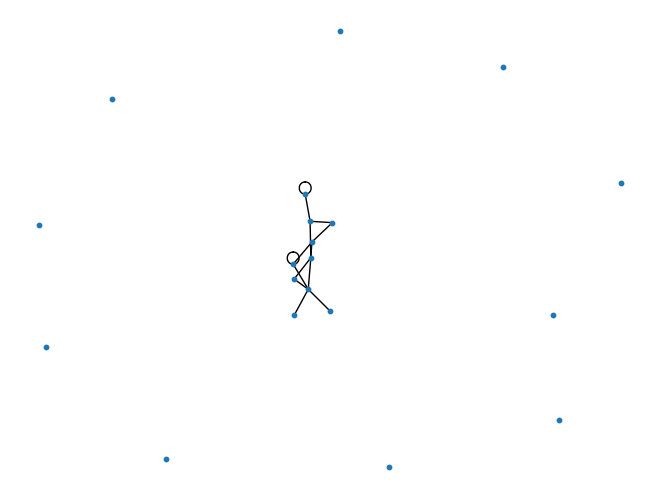

In [9]:
G = nx.Graph()
node_list = np.arange(0, 20)
adj_list = np.random.randint(low=0, high=10, size=(15, 2))
G.add_nodes_from(node_list)
G.add_edges_from(adj_list)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
nx.draw(G, with_labels=False, font_weight='bold', node_size=10)

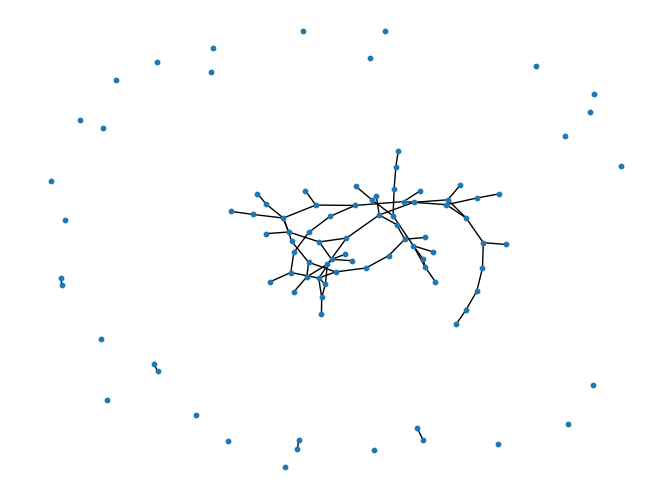

In [33]:
type_ = "cycles"
id_ = 3
filename = f"DataCycle/{type_}/{id_}.npz"
graph = np.load(filename)
node_list = graph["nodes"]
adj_list = graph["edges"]
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(adj_list)
nx.draw(G, with_labels=False, font_weight='bold', node_size=10)